<a href="https://colab.research.google.com/github/mouna0403/Tuto-llm/blob/main/Summarize_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U langchain-groq
!pip install langchain
!pip install -qU langchain-core
!pip install -qU langchain_community
!pip install -qU langchain-text-splitter
!pip install -qU langchain-document-loaders
!pip install -qU typing_extensions
!pip install -qU langgraph
# 🚀 Installation des dépendances
!pip install langchain-ollama
!pip install ollama
!curl -fsSL https://ollama.com/install.sh | sh

# Démarrer le service Ollama en arrière-plan
import subprocess
import time
import os

# Démarrer Ollama en arrière-plan
ollama_process = subprocess.Popen(['ollama', 'serve'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
time.sleep(5)  # Attendre que le service démarre

# Télécharger un modèle léger (Llama 3.2 3B ou Mistral 7B)
!ollama pull llama3.2:3b  # Modèle léger et rapide
# Alternatives :
# !ollama pull mistral:7b
# !ollama pull codellama:7b
# !ollama pull phi3:mini

print("✅ Installation terminée!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.6/449.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
ERROR: Could not find a version that satisfies the requirement langchain-text-splitter (from versions: none)
ERROR: No matching distribution found for langchain-text-splitter
ERROR: Could not find a version that satisfies the requirement langchain-document-loaders (from versions: none)
ERROR: No matching distribution found for langc

In [2]:
import getpass
import os

from langchain.chat_models import init_chat_model

token=getpass.getpass("Enter API key for Groq: ")
os.environ["GROQ_API_KEY"] = token


llm = init_chat_model("llama-3.1-8b-instant", model_provider="groq")


Enter API key for Groq: ··········


In [34]:
pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.5/323.5 kB 6.6 MB/s eta 0:00:00


In [58]:
from langchain_community.document_loaders import WebBaseLoader
from langchain.document_loaders import PyPDFLoader
# URL du PDF
url = "https://www.scribd.com/document/695978691/RAG-and-LangChain-loading-documents-round1"

# Initialisation du chargeur
loader = WebBaseLoader(url)
loader = WebBaseLoader("https://lilianweng.github.io/posts/2023-06-23-agent/")

# Chemin vers ton fichier PDF
pdf_path = "/content/sample_data/Projet_Modélisation.pdf"

# Initialisation du loader
loader = PyPDFLoader(pdf_path)
docs = loader.load()

In [59]:
docs

[Document(metadata={'producer': 'pdfTeX-1.40.24', 'creator': 'TeX', 'creationdate': '2025-10-04T19:15:25+00:00', 'moddate': '2025-10-04T19:15:25+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) kpathsea version 6.3.4', 'trapped': '/False', 'source': '/content/sample_data/Projet_Modélisation.pdf', 'total_pages': 22, 'page': 0, 'page_label': '1'}, page_content='L’amour en ´ equations\nMa¨ ımouna Gadji , Claudia Hountongbe\n02 june 2023\n1'),
 Document(metadata={'producer': 'pdfTeX-1.40.24', 'creator': 'TeX', 'creationdate': '2025-10-04T19:15:25+00:00', 'moddate': '2025-10-04T19:15:25+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) kpathsea version 6.3.4', 'trapped': '/False', 'source': '/content/sample_data/Projet_Modélisation.pdf', 'total_pages': 22, 'page': 1, 'page_label': '2'}, page_content='Table des mati` eres\n1 Pr´ esentation du probl` eme 3\n2 La m´ ethode 4\n3 Le mod` ele 5\n3.1 ´Equation de 

In [60]:
print(f"Number of pages in the documents: {len(docs)}")

Number of pages in the documents: 22


#Stuff: summarize in a single LLM call

In [61]:
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains.llm import LLMChain
from langchain_core.prompts import ChatPromptTemplate

# Define prompt
prompt = ChatPromptTemplate.from_messages(
    [("system", "Write a concise summary of the following:\\n\\n{context}")]
)

# Instantiate chain
chain = create_stuff_documents_chain(llm, prompt)

# Invoke chain
result = chain.invoke({"context": docs})
print(result)

APIStatusError: Error code: 413 - {'error': {'message': 'Request too large for model `llama-3.1-8b-instant` in organization `org_01k5w53k8gfk9sma6y1h8t3tms` service tier `on_demand` on tokens per minute (TPM): Limit 6000, Requested 8059, please reduce your message size and try again. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}

# Map-Reduce: summarize long texts via parallelization

In [38]:
from langchain_core.prompts import ChatPromptTemplate

map_prompt = ChatPromptTemplate.from_messages(
    [("system", "Write a concise summary of the following:\\n\\n{context}")]
)

In [39]:
from langchain import hub

map_prompt = hub.pull("rlm/map-prompt")

In [40]:
# Also available via the hub: `hub.pull("rlm/reduce-prompt")`
reduce_template = """
The following is a set of summaries:
{docs}
Take these and distill it into a final, consolidated summary
of the main themes.
"""

reduce_prompt = ChatPromptTemplate([("human", reduce_template)])

In [67]:
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=1000, chunk_overlap=0
)
split_docs = text_splitter.split_documents(docs)
print(f"Generated {len(split_docs)} documents.")

Generated 22 documents.


In [68]:
import operator
from typing import Annotated, List, Literal, TypedDict

from langchain.chains.combine_documents.reduce import (
    acollapse_docs,
    split_list_of_docs,
)
from langchain_core.documents import Document
from langgraph.constants import Send
from langgraph.graph import END, START, StateGraph

token_max = 1000


def length_function(documents: List[Document]) -> int:
    """Get number of tokens for input contents."""
    return sum(llm.get_num_tokens(doc.page_content) for doc in documents)


# This will be the overall state of the main graph.
# It will contain the input document contents, corresponding
# summaries, and a final summary.
class OverallState(TypedDict):
    # Notice here we use the operator.add
    # This is because we want combine all the summaries we generate
    # from individual nodes back into one list - this is essentially
    # the "reduce" part
    contents: List[str]
    summaries: Annotated[list, operator.add]
    collapsed_summaries: List[Document]
    final_summary: str


# This will be the state of the node that we will "map" all
# documents to in order to generate summaries
class SummaryState(TypedDict):
    content: str


# Here we generate a summary, given a document
async def generate_summary(state: SummaryState):
    prompt = map_prompt.invoke(state["content"])
    response = await llm.ainvoke(prompt)
    return {"summaries": [response.content]}


# Here we define the logic to map out over the documents
# We will use this an edge in the graph
def map_summaries(state: OverallState):
    # We will return a list of `Send` objects
    # Each `Send` object consists of the name of a node in the graph
    # as well as the state to send to that node
    return [
        Send("generate_summary", {"content": content}) for content in state["contents"]
    ]


def collect_summaries(state: OverallState):
    return {
        "collapsed_summaries": [Document(summary) for summary in state["summaries"]]
    }


async def _reduce(input: dict) -> str:
    prompt = reduce_prompt.invoke(input)
    response = await llm.ainvoke(prompt)
    return response.content


# Add node to collapse summaries
async def collapse_summaries(state: OverallState):
    doc_lists = split_list_of_docs(
        state["collapsed_summaries"], length_function, token_max
    )
    results = []
    for doc_list in doc_lists:
        results.append(await acollapse_docs(doc_list, _reduce))

    return {"collapsed_summaries": results}


# This represents a conditional edge in the graph that determines
# if we should collapse the summaries or not
def should_collapse(
    state: OverallState,
) -> Literal["collapse_summaries", "generate_final_summary"]:
    num_tokens = length_function(state["collapsed_summaries"])
    if num_tokens > token_max:
        return "collapse_summaries"
    else:
        return "generate_final_summary"


# Here we will generate the final summary
async def generate_final_summary(state: OverallState):
    response = await _reduce(state["collapsed_summaries"])
    return {"final_summary": response}


# Construct the graph
# Nodes:
graph = StateGraph(OverallState)
graph.add_node("generate_summary", generate_summary)  # same as before
graph.add_node("collect_summaries", collect_summaries)
graph.add_node("collapse_summaries", collapse_summaries)
graph.add_node("generate_final_summary", generate_final_summary)

# Edges:
graph.add_conditional_edges(START, map_summaries, ["generate_summary"])
graph.add_edge("generate_summary", "collect_summaries")
graph.add_conditional_edges("collect_summaries", should_collapse)
graph.add_conditional_edges("collapse_summaries", should_collapse)
graph.add_edge("generate_final_summary", END)

app = graph.compile()

/tmp/ipython-input-3072573137.py:9: LangGraphDeprecatedSinceV10: Importing Send from langgraph.constants is deprecated. Please use 'from langgraph.types import Send' instead. Deprecated in LangGraph V1.0 to be removed in V2.0.
  from langgraph.constants import Send


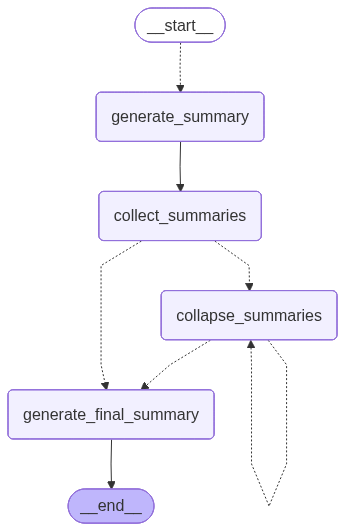

In [69]:
from IPython.display import Image

Image(app.get_graph().draw_mermaid_png())

In [70]:
async for step in app.astream(
    {"contents": [doc.page_content for doc in split_docs]},
    {"recursion_limit": 10},
):
    print(list(step.keys()))

['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['collect_summaries']


RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.1-8b-instant` in organization `org_01k5w53k8gfk9sma6y1h8t3tms` service tier `on_demand` on tokens per minute (TPM): Limit 6000, Used 21243, Requested 1171. Please try again in 2m44.142s. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}

In [71]:
print(step)

{'collect_summaries': {'collapsed_summaries': [Document(metadata={}, page_content='Based on the title "L\'amour en équations" (which translates to "Love in Equations" in English) and the authors\' names (Maëssa Gadji and Claudia Hountongbe), I can make some educated guesses about the main themes of this document.\n\n1. **Love and Mathematics**: The title suggests a connection between love and mathematical concepts, which might indicate that the document explores how mathematical ideas can be applied to understand or describe romantic relationships, emotions, or experiences.\n\n2. **Feminist Perspective**: The authors\' names, Maëssa Gadji and Claudia Hountongbe, appear to be from countries with predominantly French-speaking cultures (e.g., Benin and the Republic of the Congo, respectively). This, combined with the use of French in the title, may suggest a focus on perspectives from African or Francophone cultures, potentially offering a feminist or intersectional analysis of love and r

In [66]:
async for step in app.astream(
    {"contents": [doc.page_content for doc in split_docs]},
    {"recursion_limit": 10},
):
    print(step)
    print("=="*50)
    print("=="*50)

{'generate_summary': {'summaries': ["Based on the provided document, the main themes can be identified as:\n\n1. **Application for Data Scientist position**: The document is a job application, and the main theme revolves around highlighting the candidate's skills, experience, and qualifications for the Data Scientist – IA Générative position at ALTEN GROUP.\n\n2. **Expertise in Data Science and AI**: The document showcases Maïmouna Gadji's expertise in data science, machine learning, deep learning, and data analysis, which are essential skills for the position she is applying for.\n\n3. **Previous work experience**: The document highlights Maïmouna Gadji's previous work experience at Decathlon, where she worked as a Data Scientist, and her stage at UNISTADE, which gave her experience in analyzing sports data and detecting events automatically.\n\n4. **Technical skills**: The document mentions various technical skills that Maïmouna Gadji possesses, including Python, machine learning, de